Import libraries


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [61]:
%matplotlib inline
sns.set(font_scale=0.8)
sns.set_style("ticks")
sns.set_palette('winter')

Load a raw dataset.


In [62]:
hogwarts_data = pd.read_csv("datasets/dataset_train.csv")

In [63]:
hogwarts_data.Birthday = pd.to_datetime(hogwarts_data.Birthday)

Define the function that calculate the quantile.


In [64]:
def get_quartile(column, q_quartile) -> float:
    # quartile position
    qu_p = q_quartile * .25 * (column.size - 1)
    # quartile index
    qu_i = int(qu_p)
    # quartile position fraction part
    qu_fract = qu_p - int(qu_i)
    quartile = column.iloc[qu_i] * (1 - qu_fract) + column.iloc[qu_i +
                                                                1] * qu_fract
    return quartile

Define describe function.


In [65]:
def describe(df):
    df = df.select_dtypes(include=['int64', 'float64'])
    describe_df = pd.DataFrame(
        index=["Count", "Mean", "Std", "Min", "25%", "50%", "75%", "Max"])
    for column_name in df:
        column = df[column_name][df[column_name].notna()].sort_values()
        mean = column.sum() / column.size
        std = np.sqrt(((column - mean)**2).sum() / (column.size - 1))
        describe_df[column_name] = [
            column.size, mean, std, column.iloc[0],
            get_quartile(column, 1),
            get_quartile(column, 2),
            get_quartile(column, 3), column.iloc[column.size - 1]
        ]
    return describe_df


describe(hogwarts_data)

Index     Arithmancy    Astronomy    Herbology  \
Count  1600.00000    1566.000000  1568.000000  1567.000000   
Mean    799.50000   49634.570243    39.797131     1.141020   
Std     462.02453   16679.806036   520.298268     5.219682   
Min       0.00000  -24370.000000  -966.740546   -10.295663   
25%     399.75000   38511.500000  -489.551387    -4.308182   
50%     799.50000   49013.500000   260.289446     3.469012   
75%    1199.25000   60811.250000   524.771949     5.419183   
Max    1599.00000  104956.000000  1016.211940    11.612895   

       Defense Against the Dark Arts   Divination  Muggle Studies  \
Count                    1569.000000  1561.000000     1565.000000   
Mean                       -0.387863     3.153910     -224.589915   
Std                         5.212794     4.155301      486.344840   
Min                       -10.162119    -8.727000    -1086.496835   
25%                        -5.259095     3.099000     -577.580096   
50%                        -2.589342     4.624000     -419.164294   
75%                         4.904680     5.667000      254.994857   
Max                         9.667405    10.032000     1092.388611   

       Ancient Runes  History of Magic  Transfiguration      Potions  \
Count    1565.000000       1557.000000      1566.000000  1570.000000   
Mean      495.747970          2.963095      1030.096946     5.950373   
Std       106.285165          4.425775        44.125116     3.147854   
Min       283.869609         -8.858993       906.627320    -4.697484   
25%       397.511047          2.218653      1026.209993     3.646785   
50%       463.918305          4.378176      1045.506996     5.874837   
75%       597.492230          5.825242      1058.436410     8.248173   
Max       745.396220         11.889713      1098.958201    13.536762   

       Care of Magical Creatures       Charms       Flying  
Count                1560.000000  1600.000000  1600.000000  
Mean                   -0.053427  -243.374409    21.958012  
Std                     0.971457     8.783640    97.631602  
Min                    -3.313676  -261.048920  -181.470000  
25%                    -0.671606  -250.652600   -41.870000  
50%                    -0.044811  -244.867765    -2.515000  
75%                     0.589919  -232.552305    50.560000  
Max                     3.056546  -225.428140   279.070000

Visualize histogram.


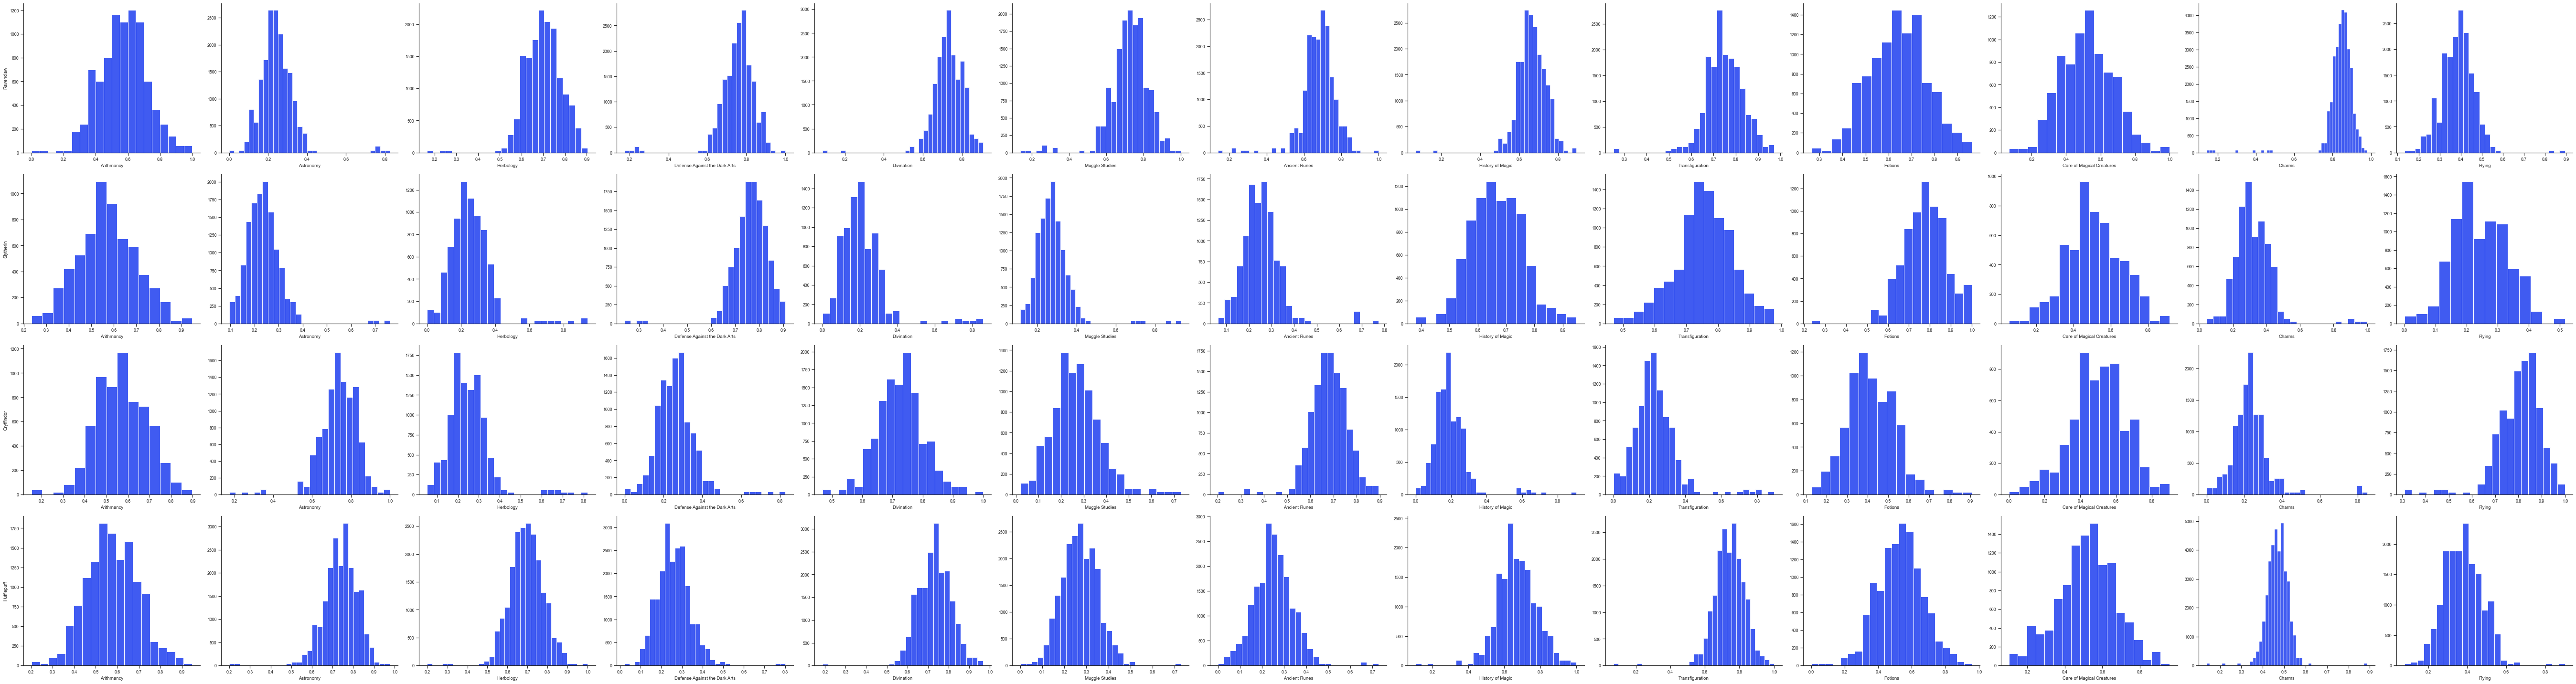

In [69]:
def histogram(df, figsize=(75, 20)):
    fig, axs = plt.subplots(4, 13, figsize=figsize)
    sns.despine()
    houses = ["Ravenclaw", "Slytherin", "Gryffindor", "Hufflepuff"]
    y = 0
    describ_df = describe(df)
    for h in houses:
        x = 0
        house_df = df[df["Hogwarts House"] == h].select_dtypes(
            include=['float64'])
        for column_name in house_df:
            house_df[column_name] = (house_df[
                column_name] - describ_df[column_name]['Min'] )/ (describ_df[
                    column_name]['Max'] - describ_df[column_name]['Min'])
            s = sns.histplot(data=house_df,
                             x=column_name,
                             ax=axs[y, x],
                             stat='frequency')
            if x != 0:
                s.set_ylabel('')
            else:
                s.set_ylabel(h)
            x += 1
        y += 1
    plt.tight_layout()
    plt.show()


histogram(hogwarts_data)


Scatter plot.


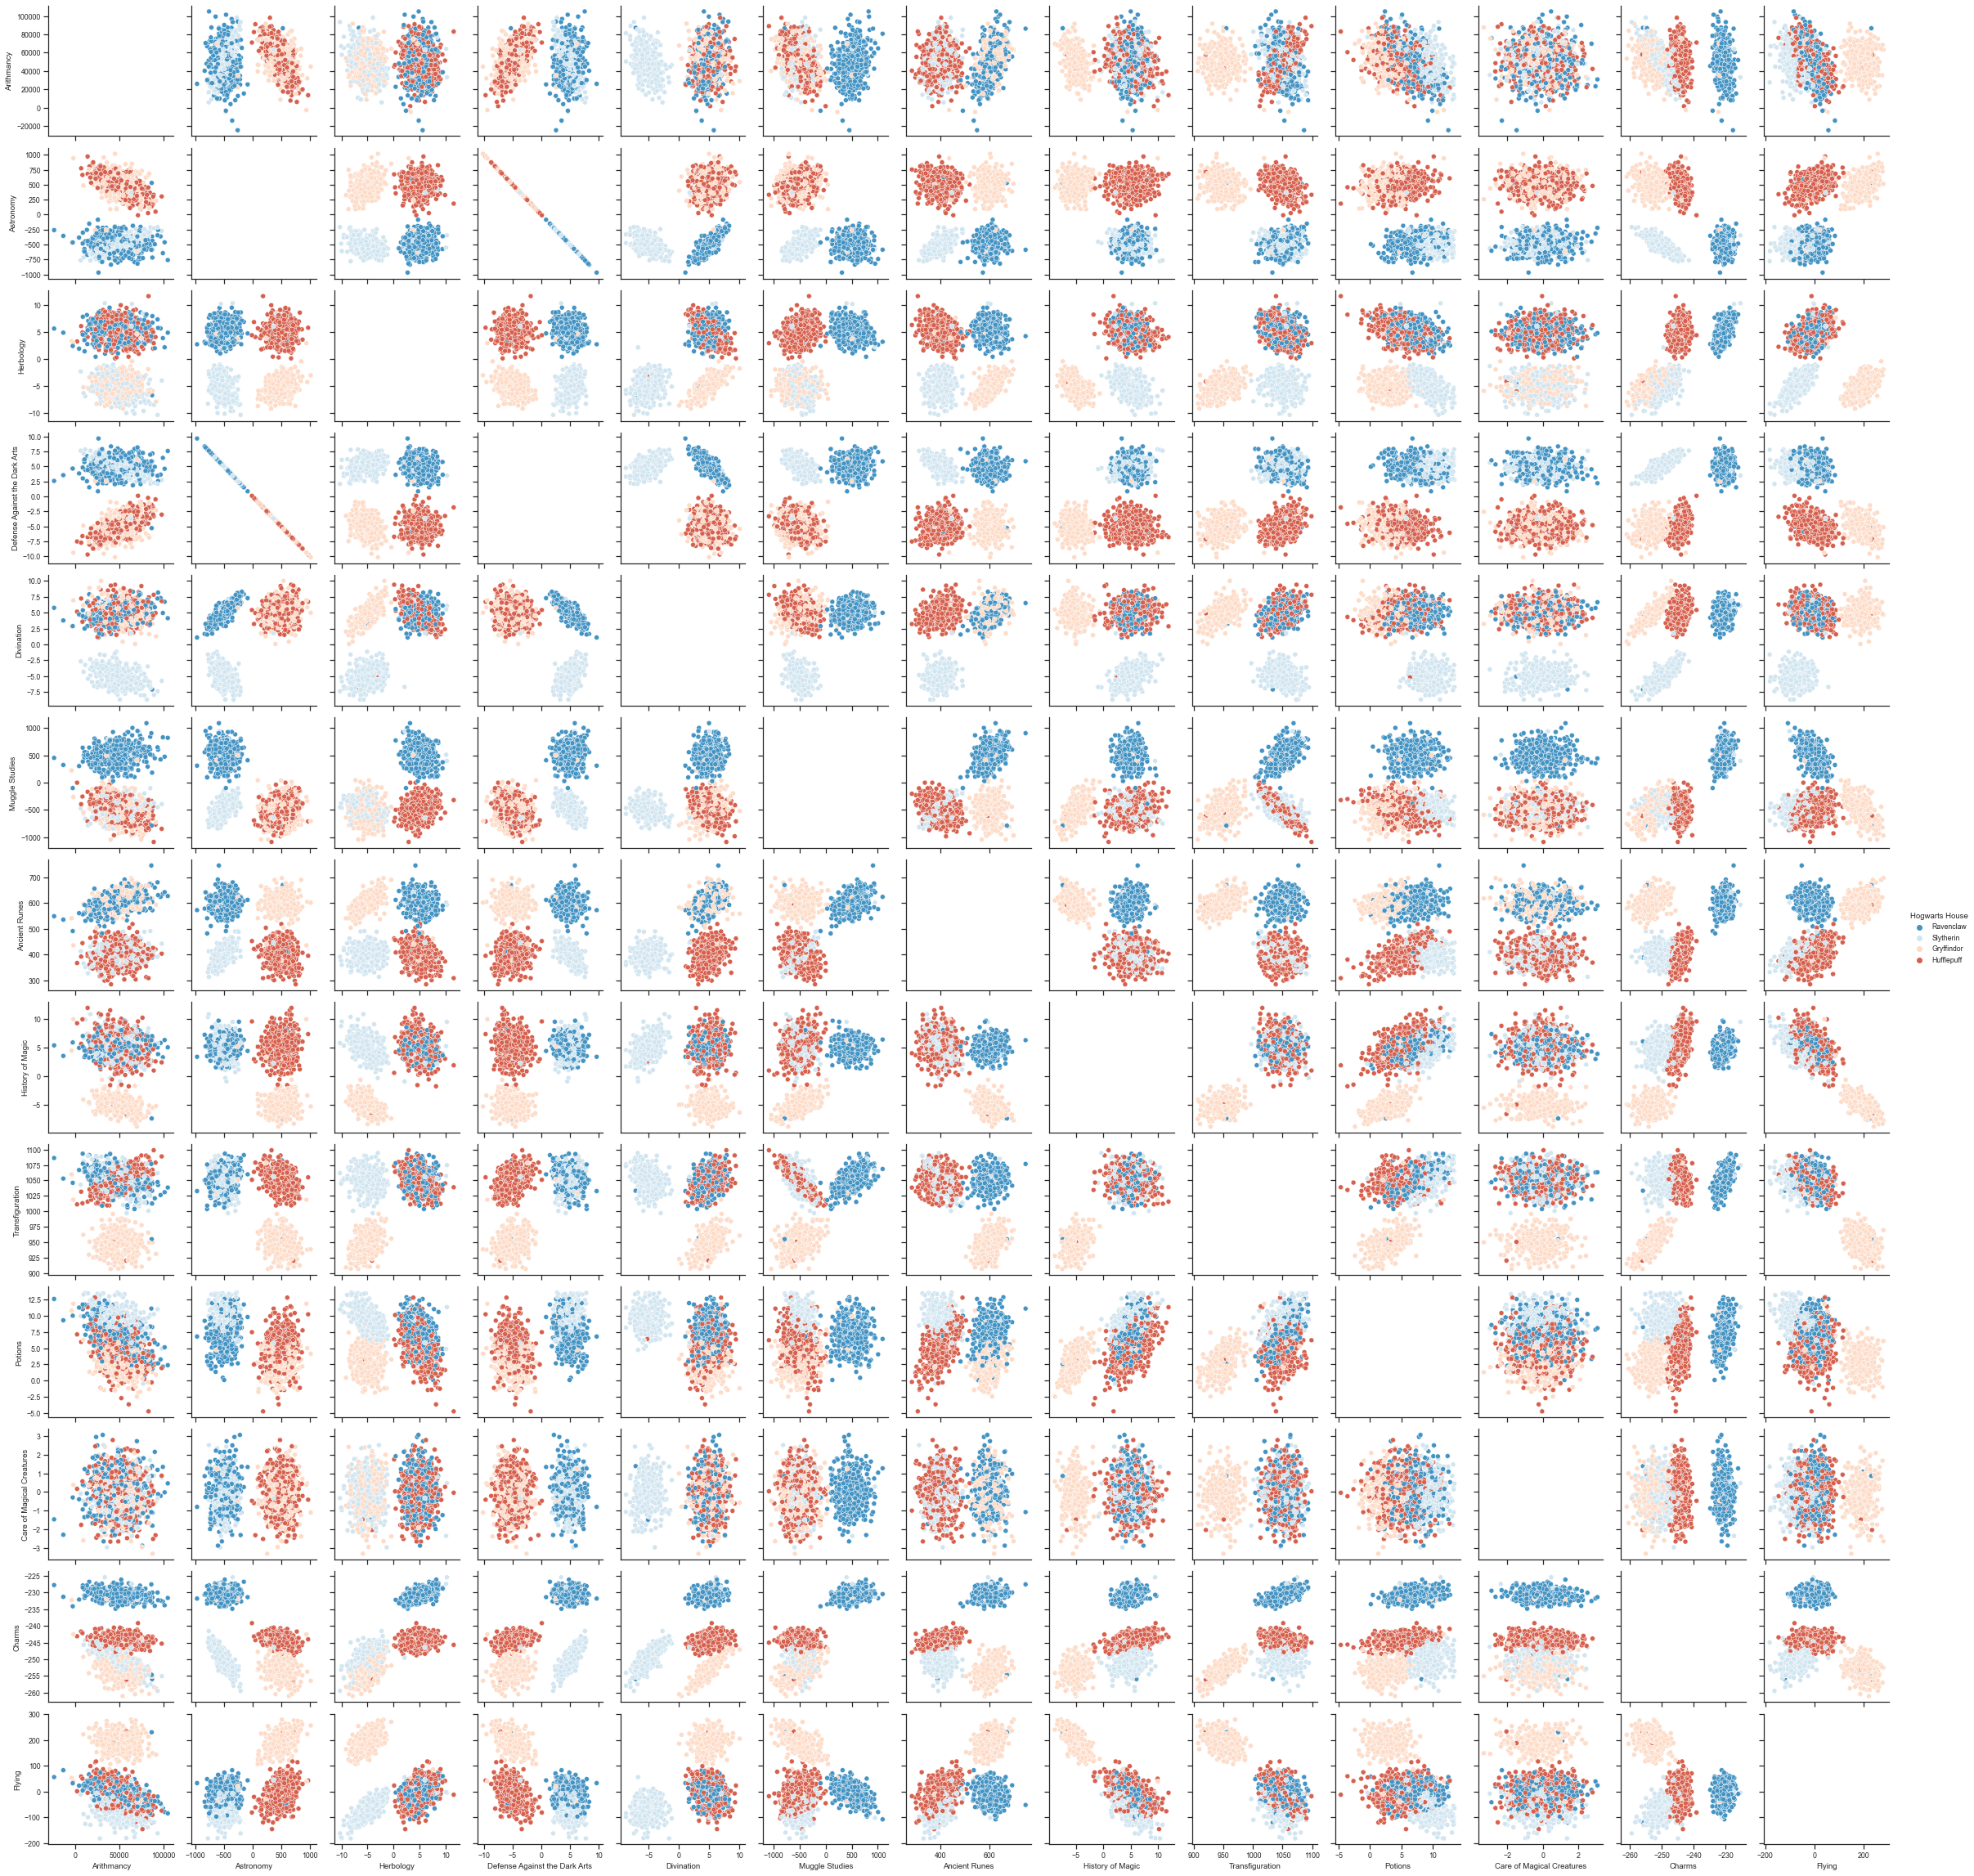

In [68]:
def show_scatter(df):
    g = sns.PairGrid(df,
                     vars=[
                         'Arithmancy', 'Astronomy', 'Herbology',
                         'Defense Against the Dark Arts', 'Divination',
                         'Muggle Studies', 'Ancient Runes', 'History of Magic',
                         'Transfiguration', 'Potions',
                         'Care of Magical Creatures', 'Charms', 'Flying'
                     ],
                     hue="Hogwarts House",
                     palette='RdBu_r')
    g.map_offdiag(sns.scatterplot)
    g.add_legend()
    plt.show()


show_scatter(hogwarts_data)